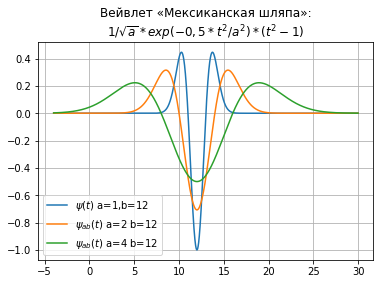

In [1]:
from numpy import*
import matplotlib.pyplot as plt
x= arange(-4,30,0.01)
def w(a,b,t):    
    f =(1/a**0.5)*exp(-0.5*((t-b)/a)**2)* (((t-b)/a)**2-1)
    return f
plt.title("Вейвлет «Мексиканская шляпа»:\n$1/\sqrt{a}*exp(-0,5*t^{2}/a^{2})*(t^{2}-1)$")
y=[w(1,12,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ a=1,b=12") 
y=[w(2,12,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=2 b=12")   
y=[w(4,12,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ a=4 b=12")   
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [2]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=256
T=50

Size = 200

def S(t):
    if t >= 0 and t <=Size:
        return sin(2*pi*t/T)
    else:
        return 0
#     return sin(2*pi*t/T)



def S_noise(t):
    return sin(2*pi*t/T)+ np.random.normal(0, 0.2, 1)


def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

def w_n(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S_noise(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

49
200
[[ 0.124  0.333  0.564 ... -1.281 -1.262 -1.245]
 [ 0.071  0.276  0.489 ... -1.28  -1.261 -1.244]
 [ 0.007  0.157  0.346 ... -1.277 -1.259 -1.242]
 ...
 [-0.    -0.034 -0.166 ...  1.273  1.255  1.238]
 [-0.    -0.    -0.346 ...  1.277  1.259  1.242]
 [-0.    -0.    -0.489 ...  1.28   1.261  1.244]]
200
49


/var/folders/4l/x39d6t210x513txrbx38qvmm0000gn/T/ipykernel_7212/4223664546.py:43: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


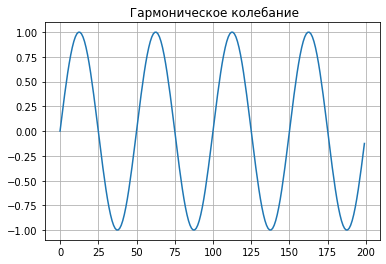

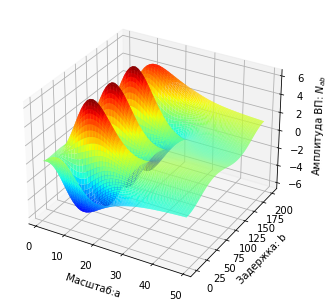

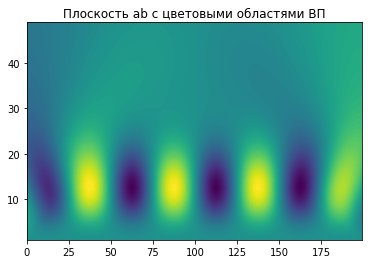

In [6]:

plt.figure()
plt.title(' Гармоническое колебание', size=12)
y=[S(t) for t in arange(0,Size,1)]
x=[t for t in arange(0,Size,1)]
plt.plot(x,y)
plt.grid()

Size_A = 50
A = arange(1,Size_A,1)
print(len(A))
B = arange(0, Size, 1)
print(len(B))
# z = array([w(i,j) for i in A for j in B])

Z = zeros((Size, Size_A - 1))

for i in A:
    for j in B:
        Z[j][i-1] = w(i,j)

print(Z)





A_par, B_par = meshgrid(A, B)

# B_par, A_par = meshgrid(B^)

# print(A_par, B_par)
# Z = z.reshape(Size_A - 1, Size)



print(len(Z))
print(len(Z[0]))




fig = plt.figure('Вейвлет- спектр: гармонического колебания')
ax = Axes3D(fig)
ax.plot_surface(A_par, B_par, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel(' Масштаб:a')
ax.set_ylabel('Задержка: b')
ax.set_zlabel('Амплитуда ВП: $ N_{ab}$')

plt.figure('2D-график для z = w (a,b)')
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(B_par, A_par, Z, 100)
plt.show()


264


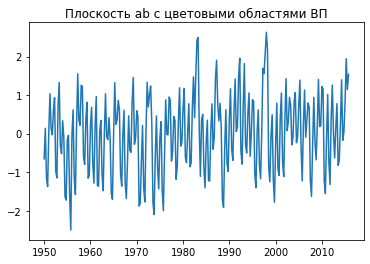

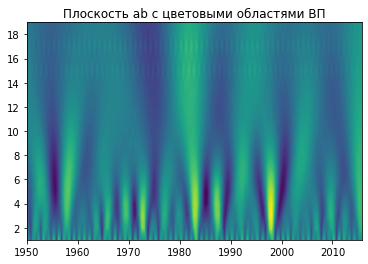

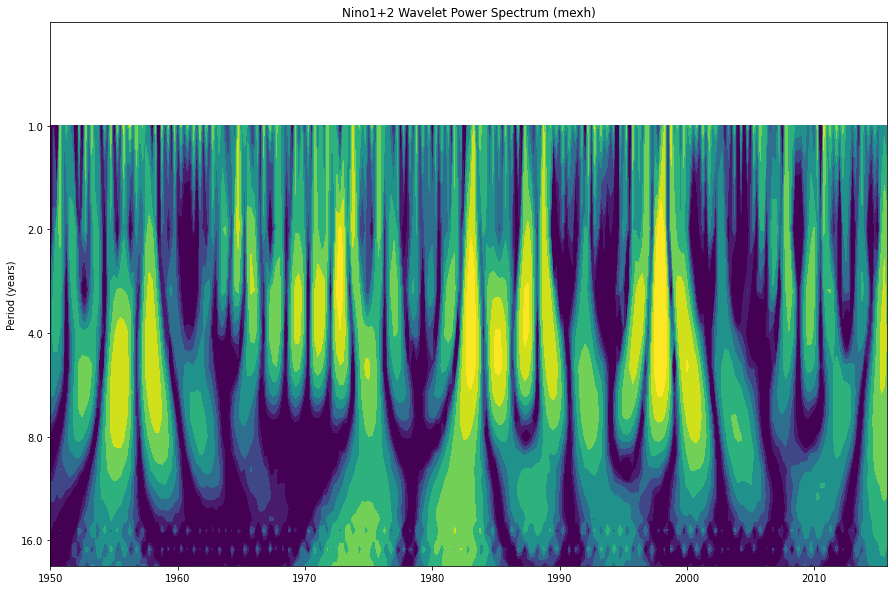

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pywt


time, sst = pywt.data.nino()
# print(time)
# print(sst)
dt = time[1] - time[0]

data_size = len(time)
print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 20
scales = np.arange(1, max_scale)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
# print(cfs)
# print(len(cfs[0]))


A_scales, B_time = meshgrid(time,scales)
# CFS = cfs.reshape(max_scale-1,data_size - 1)


plt.figure('2D-график для z = w (a,b)')
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time, sst)
plt.show()





plt.figure('2D-график для z = w (a,b)')
plt.title('Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(A_scales, B_time, cfs, 100)
plt.show()

power = (abs(cfs)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

Text(0, 0.5, 'period')

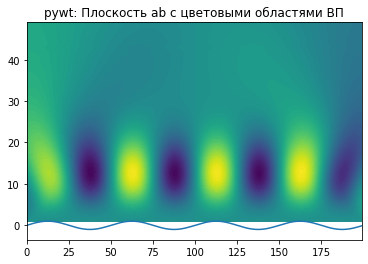

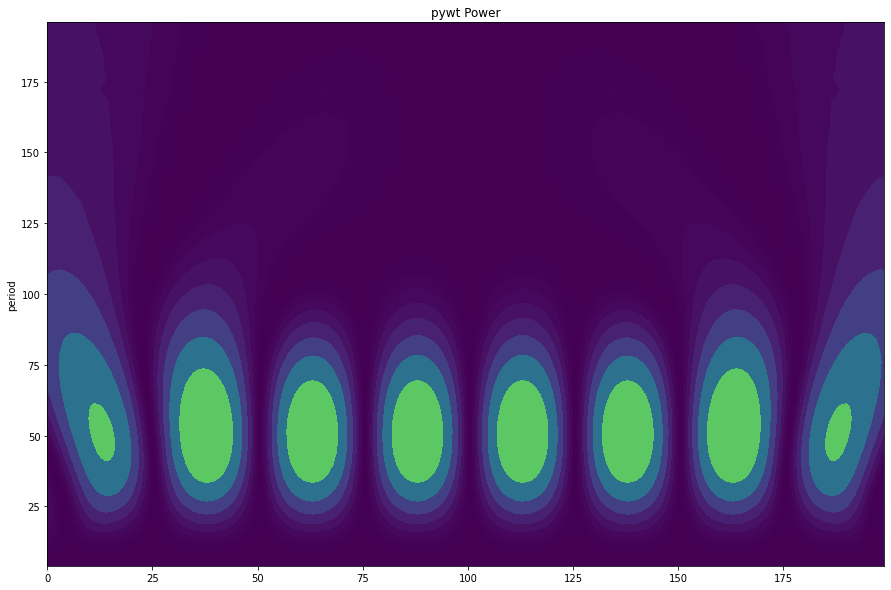

In [9]:
# time, sst = pywt.data.nino()

sst=[S(t) for t in arange(0,Size,1)]
time=[t for t in arange(0,Size,1)]




# print(time)
# print(sst)
# dt = time[1] - time[0]
dt = 1



# data_size = len(time)
# print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 50
scales = np.arange(1, max_scale)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
# print(cfs)
# print(len(cfs[0]))


A_scales, B_time = meshgrid(time,scales)
# CFS = cfs.reshape(max_scale-1,data_size - 1)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time, sst)
# plt.show()





plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(A_scales, B_time, cfs, 100)
# plt.show()





power = (abs(cfs)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, period, power, levels, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')


50


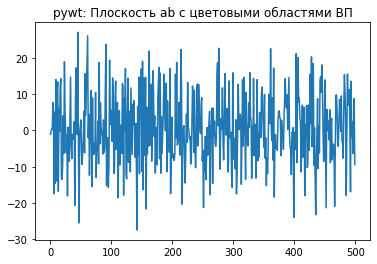

In [10]:
# time, sst = pywt.data.nino()


def S_noise_1(t,noise = 0.2):
#     return sin(2*pi*t/T) + sin(20*pi*t/T) + np.random.normal(0, noise, 1)[0]
    return sin(2*pi*t/T) + np.random.normal(0, noise, 1)[0]
print(T)
Size = 500

Size_noise = 10

sst=[S_noise_1(t,noise = Size_noise) for t in arange(0,Size,1)]
time=[t for t in arange(0,Size,1)]

# print(sst


# print(time)
# print(sst)
# dt = time[1] - time[0]
dt = 1



# data_size = len(time)
# print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 50
scales = np.arange(1, max_scale)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
# print(cfs)
# print(len(cfs[0]))


A_scales, B_time = meshgrid(time,scales)
# CFS = cfs.reshape(max_scale-1,data_size - 1)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time, sst)

plt.show()




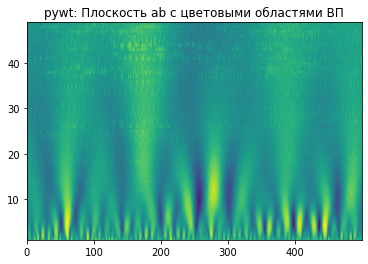

In [11]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(A_scales, B_time, cfs, 100)
plt.show()

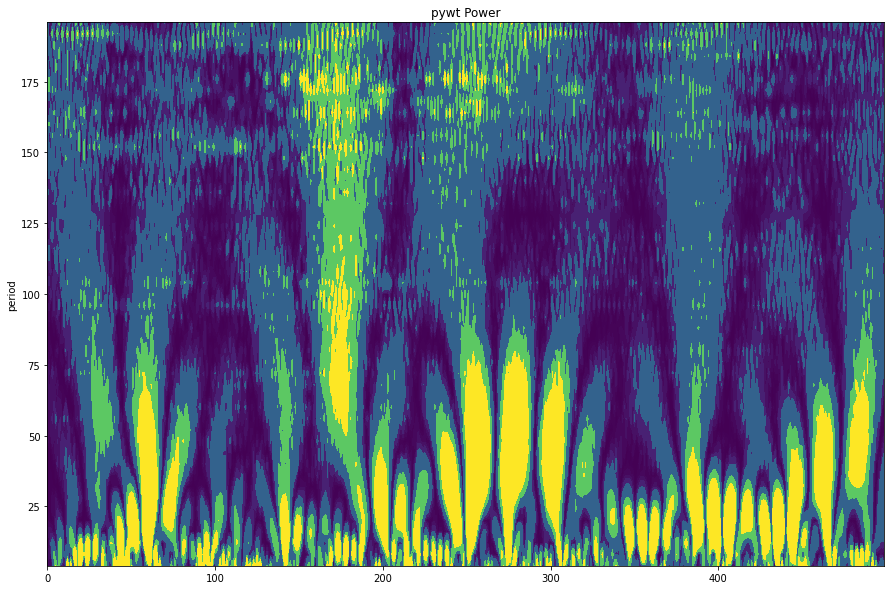

In [12]:
power = (abs(cfs)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4,8,16,64,128]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, period, power, levels, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

In [5]:
import pandas as pd
file_name = '../raw CH4 954 ppm'
df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df)

           x         Pyro         OAD      y2         Ref
0          0  637755000.0 -33743600.0 -159744   -547072.0
1          1  665619000.0 -31618000.0 -164608  -8699900.0
2          2  712540000.0 -28067100.0 -190976 -10134300.0
3          3  731017000.0 -22965000.0 -189440 -12043300.0
4          4  797159000.0 -16724700.0 -189952 -14116600.0
...      ...          ...         ...     ...         ...
47995  47995 -475278000.0   7954690.0 -171776  16955100.0
47996  47996 -312825000.0    126464.0 -185856  18132700.0
47997  47997  -22991600.0  -7788030.0 -161792  16607700.0
47998  47998   68592900.0 -15332400.0 -177408  11885100.0
47999  47999  270396000.0 -22122200.0 -180224   8439300.0

[48000 rows x 5 columns]


In [24]:
file_name = '../CH4 954 ppm raw/01'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"../CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x           y0          y1      y2          y3
0            0  527484000.0 -32779000.0 -171264   3549180.0
1            1  580732000.0 -33825000.0 -168960   2942720.0
2            2  644687000.0 -33116200.0 -170752  -1469440.0
3            3  679584000.0 -30837800.0 -154368  -8977410.0
4            4  714793000.0 -27103200.0 -172032 -10121500.0
...        ...          ...         ...     ...         ...
9599995  95995  702471000.0 -23103000.0 -188928 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408 -15446000.0

[9600000 rows x 5 columns]


In [100]:
Size_pyro = 9600000
# Size_pyro = 2000
sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

# print(time)
# print(sst)
# dt = time[1] - time[0]
dt = 1/48000

# data_size = len(time)
# print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 30
scales = np.arange(0.7, max_scale, 0.5)

[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)
# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))


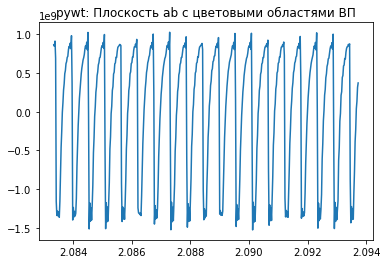

In [101]:
slase = 100000
size_shape = 500

cfs_pyro_shape = array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])
# print(len(cfs_pyro_shape))
# print(len(cfs_pyro_shape[0]))

A_scales, B_time = meshgrid(time[slase:slase+size_shape]*dt, 1.0/frequencies)

# A_scales, B_time = meshgrid(time[:size_shape]/48000,scales)

# A_scales, B_time = meshgrid(time[1000:1000+size_shape]/48000,1.0/frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

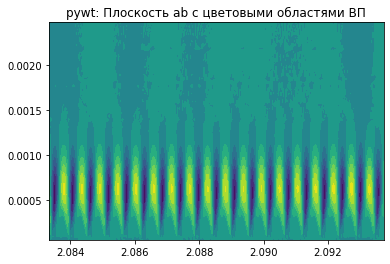

In [102]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, 10)
plt.show()

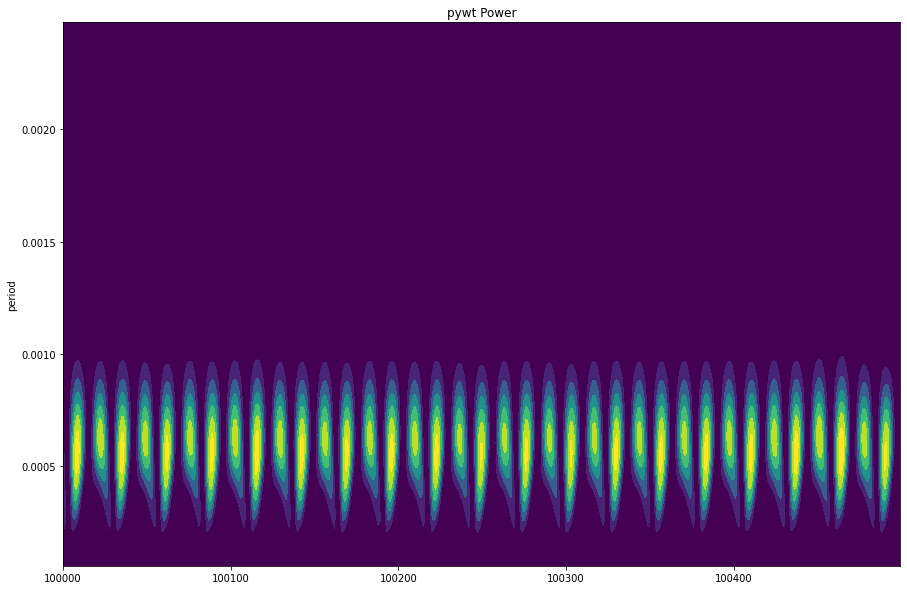

In [103]:
power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (abs(cfs_pyro_shape))**2
period = 1. / frequencies
# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

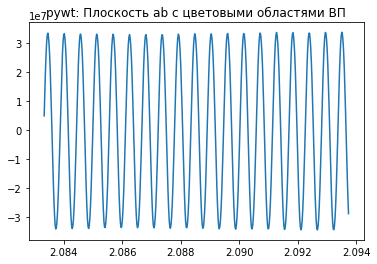

In [104]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

A_scales, B_time = meshgrid(time[slase:slase+size_shape]*dt, 1.0/frequencies)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
cfs_oad_shape = array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

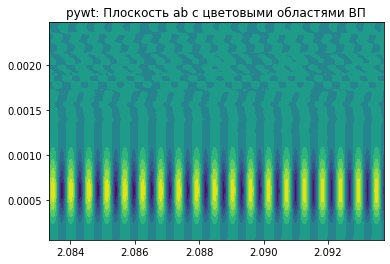

In [105]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

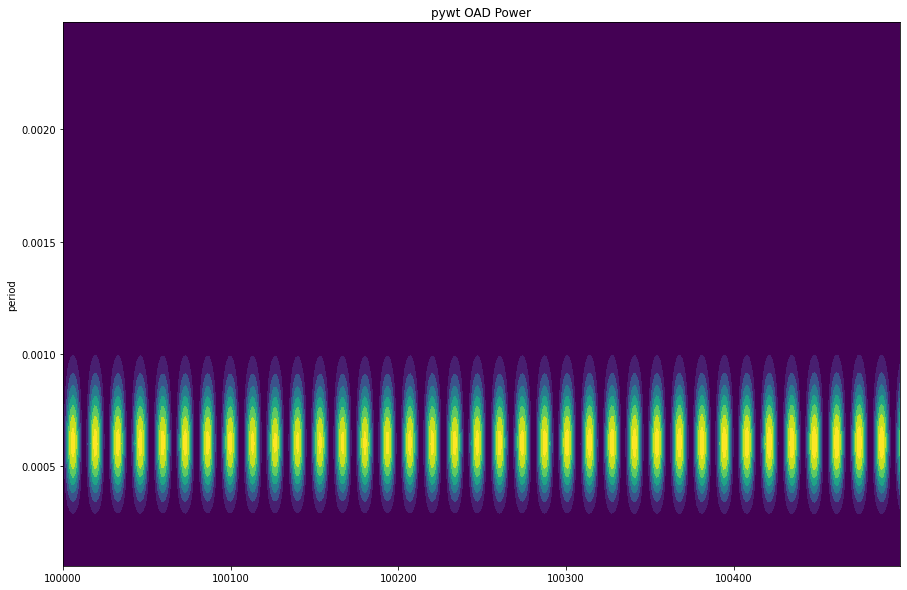

In [106]:
power_oad = (abs(cfs_oad)) ** 2
power_oad_shape = (abs(cfs_oad_shape))**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

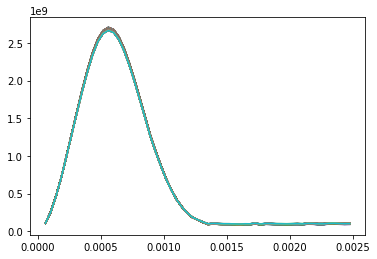

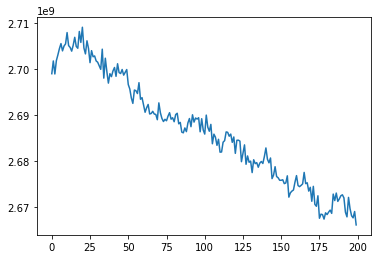

In [141]:
delta_time = 48000
interval = int(Size_pyro/delta_time)


# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = abs(cfs_pyro).transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = zeros((int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[i-1] = temp_pyro[i-1].mean()
    plt.plot(period, mean_pyro_scales)
    Max_pyro_amp_scales[j] = mean_pyro_scales.max()
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()


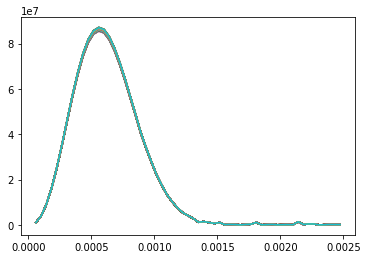

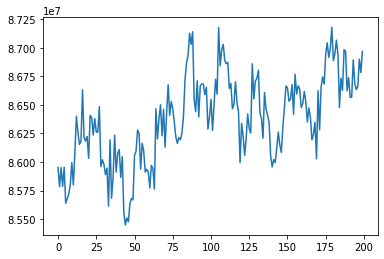

In [142]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = abs(cfs_oad).transpose()
# Amp_oad = zeros((interval))
mean_oad_scales = zeros((int(len(scales))))

Max_oad_amp_scales = zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[i-1] = temp_oad[i-1].mean()
    plt.plot(period, mean_oad_scales)
    Max_oad_amp_scales[j] = mean_oad_scales.max()
plt.show()

plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()


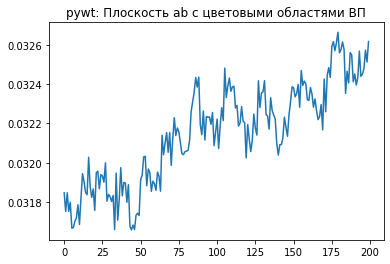

In [143]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(S_wavelet)
plt.show()

In [126]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"../CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE-1]
    OAD = df.y1.values[0:SAMPLE_RATE-1]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f))

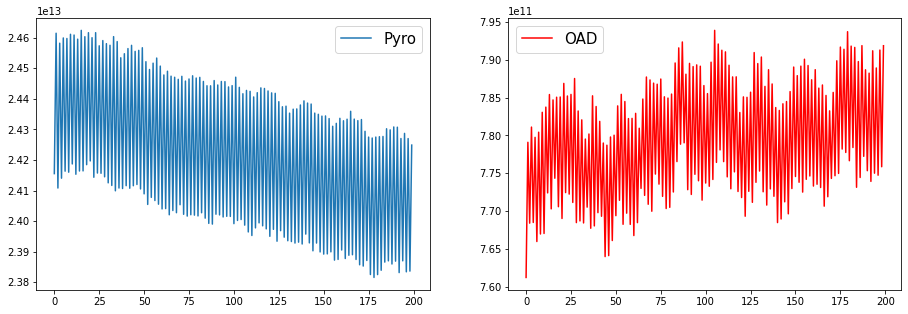

In [127]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})


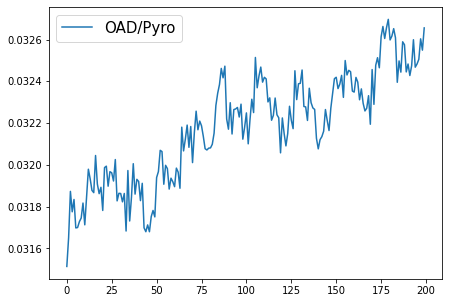

In [128]:
S = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

<class 'numpy.ndarray'>


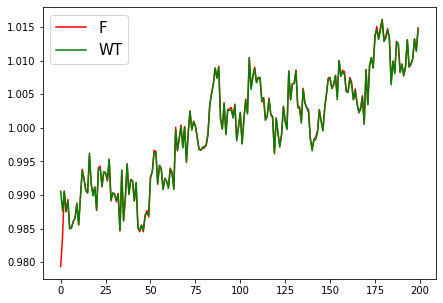

In [147]:
print(type(S))

w_alpha = S_wavelet.mean()
f_alpha = S.mean()

WT_norm = S_wavelet / w_alpha
F_norm = S / f_alpha

# WT_norm = (S_wavelet - S_wavelet.mean()) / S_wavelet.std()
# F_norm = (S-S.mean()) / S.std()

fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],F_norm, label='F', color = 'red')
ax1.plot([i for i in range(200)],WT_norm, label='WT', color = 'green')
ax1.legend(prop={'size': 15})


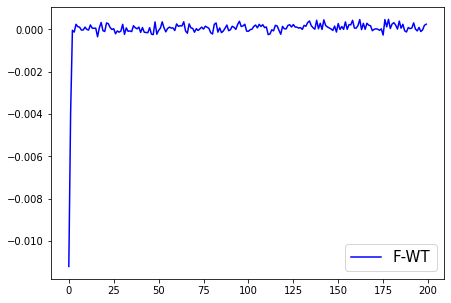

In [148]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],F_norm - WT_norm, label='F-WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [6]:
file_name = '../raw2/9,7 ppm CH4/000'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = f"0{i}" if i>=10 else f"00{i}"
    file_name = f"../raw2/9,7 ppm CH4/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x            y0        y1      y2          y3
0            0 -1.307740e+09  955136.0 -179968   3987460.0
1            1 -8.184170e+08  881920.0 -165376  10886900.0
2            2 -6.246920e+08  656640.0 -151296   8353540.0
3            3 -3.381080e+08  340480.0 -160000  14266600.0
4            4 -2.503510e+08  -20736.0 -168704  19014100.0
...        ...           ...       ...     ...         ...
9599995  95995  4.407080e+08 -717824.0 -153088   3948030.0
9599996  95996  4.240560e+08 -749312.0 -163328   2899710.0
9599997  95997  4.891790e+08 -750336.0 -151040     10240.0
9599998  95998  4.864580e+08 -750080.0 -143360  -7594750.0
9599999  95999  5.304660e+08 -725760.0 -153344  -8709890.0

[9600000 rows x 5 columns]


In [7]:
Size_pyro = 9600000
# Size_pyro = 2000
sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

# print(time)
# print(sst)
# dt = time[1] - time[0]
dt = 1/48000

# data_size = len(time)
# print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 30
scales = np.arange(0.7, max_scale, 0.5)

[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)
# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))



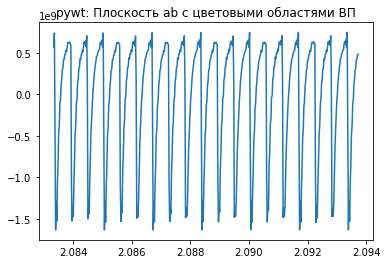

In [8]:
slase = 100000
size_shape = 500

cfs_pyro_shape = array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])
# print(len(cfs_pyro_shape))
# print(len(cfs_pyro_shape[0]))

A_scales, B_time = meshgrid(time[slase:slase+size_shape]*dt, 1.0/frequencies)

# A_scales, B_time = meshgrid(time[:size_shape]/48000,scales)

# A_scales, B_time = meshgrid(time[1000:1000+size_shape]/48000,1.0/frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

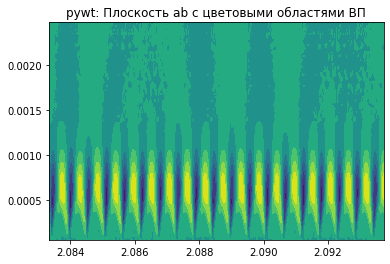

In [9]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, 10)
plt.show()

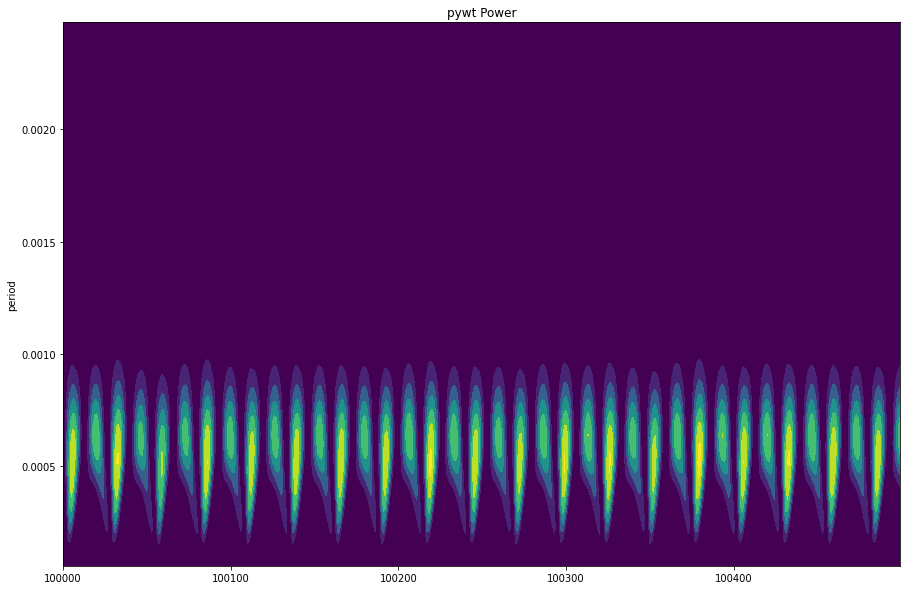

In [10]:
power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (abs(cfs_pyro_shape))**2
period = 1. / frequencies
# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

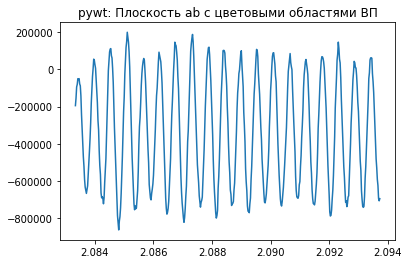

In [11]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

A_scales, B_time = meshgrid(time[slase:slase+size_shape]*dt, 1.0/frequencies)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
cfs_oad_shape = array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

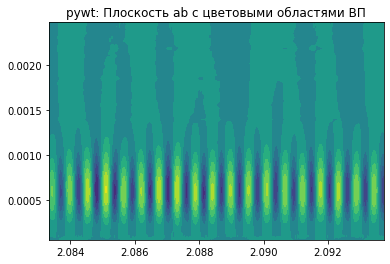

In [12]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

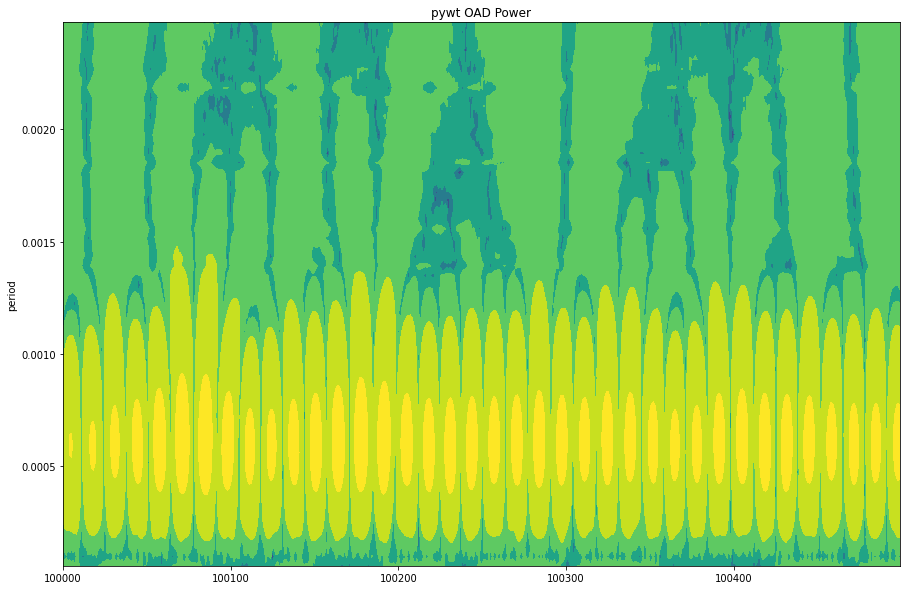

In [14]:
power_oad = (abs(cfs_oad)) ** 2
power_oad_shape = (abs(cfs_oad_shape))**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

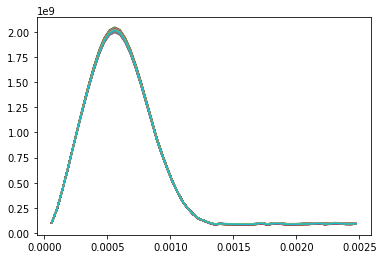

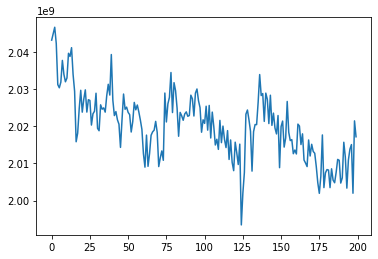

In [15]:
delta_time = 48000
interval = int(Size_pyro/delta_time)


# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = abs(cfs_pyro).transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = zeros((int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[i-1] = temp_pyro[i-1].mean()
    plt.plot(period, mean_pyro_scales)
    Max_pyro_amp_scales[j] = mean_pyro_scales.max()
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()

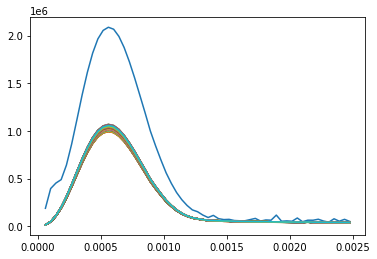

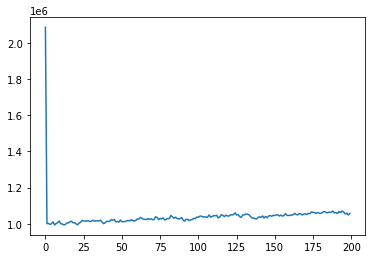

In [16]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = abs(cfs_oad).transpose()
# Amp_oad = zeros((interval))
mean_oad_scales = zeros((int(len(scales))))

Max_oad_amp_scales = zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[i-1] = temp_oad[i-1].mean()
    plt.plot(period, mean_oad_scales)
    Max_oad_amp_scales[j] = mean_oad_scales.max()
plt.show()

plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()



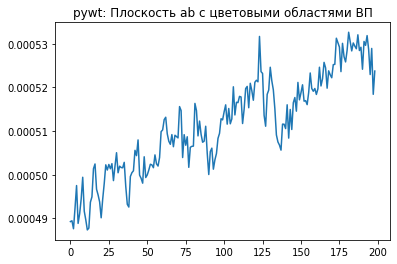

In [18]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(S_wavelet[1:])
plt.show()

In [19]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = f"0{i}" if i>=10 else f"00{i}"
    file_name = f"../raw2/9,7 ppm CH4/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE-1]
    OAD = df.y1.values[0:SAMPLE_RATE-1]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f))

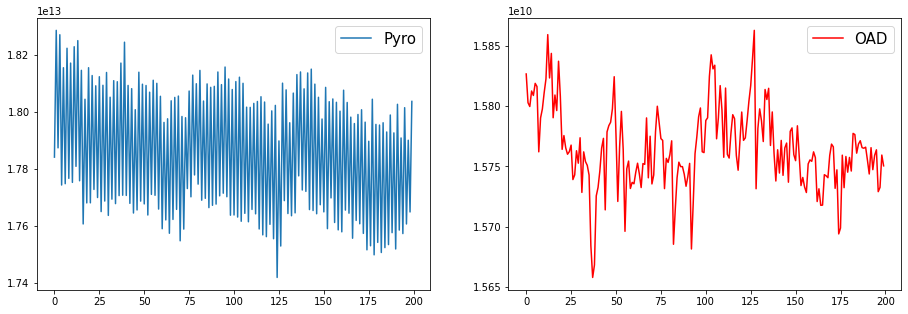

In [20]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})



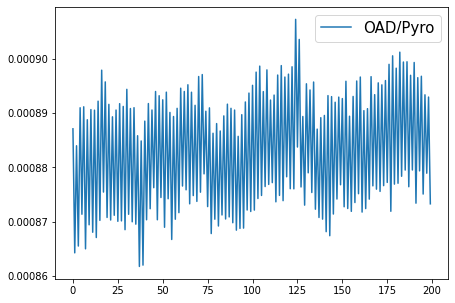

In [21]:
S = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

<class 'numpy.ndarray'>


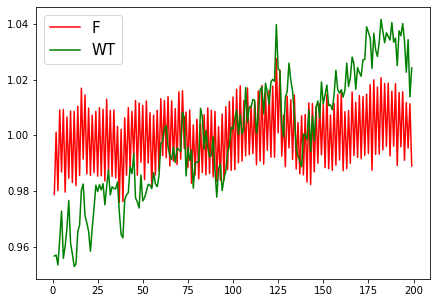

In [25]:
print(type(S))

w_alpha = S_wavelet[1:].mean()
f_alpha = S[1:].mean()

WT_norm = S_wavelet / w_alpha
F_norm = S / f_alpha

# WT_norm = (S_wavelet - S_wavelet.mean()) / S_wavelet.std()
# F_norm = (S-S.mean()) / S.std()

fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(1,200)],F_norm[1:], label='F', color = 'red')
ax1.plot([i for i in range(1,200)],WT_norm[1:], label='WT', color = 'green')
ax1.legend(prop={'size': 15})

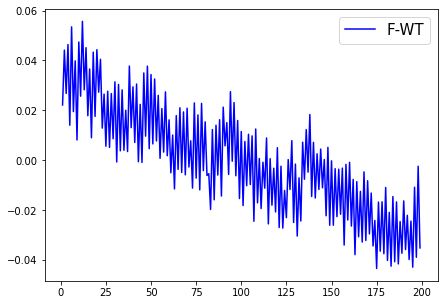

In [27]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(1,200)],F_norm[1:] - WT_norm[1:], label='F-WT', color = 'blue')
ax1.legend(prop={'size': 15})